In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from config import api_key


from citipy import citipy
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

In [2]:
output_data_file = "cities.csv"

In [3]:
lat_range = (-90, 90)
lng_range = (-180, 180)

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

In [5]:
print(cities)


['mahebourg', 'severo-kurilsk', 'hermanus', 'avarua', 'rikitea', 'belushya guba', 'mataura', 'chuy', 'taltal', 'pio ix', 'east london', 'mingguang', 'butaritari', 'ushuaia', 'busselton', 'castro', 'tuktoyaktuk', 'yar-sale', 'ulladulla', 'cockburn town', 'qaanaaq', 'san policarpo', 'san patricio', 'lompoc', 'dikson', 'barentsburg', 'de aar', 'hambantota', 'kaitangata', 'attawapiskat', 'konosha', 'mount gambier', 'georgetown', 'barrow', 'sedelnikovo', 'hay river', 'kiunga', 'chepareria', 'beba', 'marau', 'omagh', 'puerto leguizamo', 'klaksvik', 'puerto ayora', 'sentyabrskiy', 'cape town', 'bluff', 'katangli', 'kapaa', 'aykhal', 'atar', 'mtwara', 'tasiilaq', 'tsihombe', 'vostok', 'garowe', 'yulara', 'bengkulu', 'tarata', 'karaul', 'marzuq', 'saint george', 'carnarvon', 'victoria', 'cabo san lucas', 'vardo', 'mar del plata', 'hithadhoo', 'togur', 'polunochnoye', 'kindu', 'copiapo', 'kavieng', 'jamestown', 'el badari', 'asmar', 'asau', 'imeni poliny osipenko', 'thompson', 'la union', 'champ

In [6]:
#probando que jalo la informacion correctamente
query_url = f"{url}appid={api_key}&q={'silao'}&units={units}"

In [7]:
weather_response = requests.get(query_url)
weather_json = weather_response.json()

In [8]:
temperature = weather_json["main"]["temp"]

In [9]:
print(f"The temperature in Silao is {temperature}C.")

The temperature in Silao is 24C.


In [10]:
humidity = weather_json["main"]["humidity"]

In [11]:
print(f"The humidity in Silao is {humidity}%" )

The humidity in Silao is 25%


In [12]:
wind = weather_json["wind"]["speed"]

In [13]:
print(f"The wind speed in Silao is {wind}" )

The wind speed in Silao is 2.6


In [14]:
clouds = weather_json["clouds"]["all"]

In [15]:
print(f"The cloud cover in Silao is {clouds} %")

The cloud cover in Silao is 40 %


In [16]:
latitude = weather_json["coord"]["lat"]

In [17]:
print(f"Silao is at a latitude of {latitude}")

Silao is at a latitude of 20.94


In [18]:
# ahora el loop sobre temperatura
array_temperature = []
current_temperature = 0
for city in cities:
    query_url = f"{url}appid={api_key}&q={city}&units={units}"
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    if weather_json["cod"] != '404':
        current_temperature = weather_json["main"]["temp"]
        array_temperature.append(current_temperature)

In [19]:
#checando que funcione bien
print(array_temperature)

[27, -6.26, 14.82, 28, 24.6, 21.97, 22.47, 22.17, 30.2, 22.95, 3.42, 27.77, 8, 14.52, 19, -16, -14.68, 23.77, 26.45, -18.38, 26.12, 26.5, 15.83, -18.73, 20.22, 22, 22.37, -6.58, 17, 24.42, 28.47, -13, 22.35, 11, 29, 27, 6, 29.17, 8, 28, 19, 22.97, -14.76, 26.38, -33.18, 15.62, 27, 2, -14.95, 15.33, 25, 24, 3.93, -1, 18.78, 26.44, 24.53, 6.62, 28.67, 26.43, -16.42, -10.6, 20.38, 21, 29.28, 18.56, 0.63, -31.17, -9, 23.88, 28, -10.27, 16, -4.53, 0, 25.6, 20.08, 17, 18.68, -18, 14.18, 19.68, 14.57, 23.26, 17.06, 13.03, 26.67, -17.27, 20.78, 1.38, 24.41, -4.52, -27.97, 22.81, 2.65, 25.08, -3.94, 10, 23.68, 25, -6, 20.48, -10, -13.95, 21.38, -25.27, 1.9, 9, 26.08, 23.88, 12, 24.13, 25.73, 27, 7.39, -12.07, 17, -5.97, -9.52, 30, 27.41, 21, -22.92, 28.48, 21, 27.68, -33, 17, 10.85, -9, 23, 26.4, -12.6, 26.01, 20.03, -9.95, 22.25, 26.23, 10.51, -15.97, 28, -7, 17.58, 25.33, 26.41, 24.33, 19, -17.75, 26.73, -4.07, -3.12, 17, -9, 24, 12.25, -15.87, -2, 22.66, 14, 8, 28, 22.43, 15.51, -31.02, -21.

In [20]:
#checando cuantas mediciones quedan
len(array_temperature)

541

In [21]:
# ahora el loop sobre latitud
array_latitude = []
current_latitude = 0
for city in cities:
    query_url = f"{url}appid={api_key}&q={city}&units={units}"
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    if weather_json["cod"] != '404':
        current_latitude = weather_json["coord"]["lat"]
        array_latitude.append(current_latitude)

In [22]:
print(array_latitude)

[-20.41, 50.68, -34.42, -21.21, -23.12, -46.19, -33.69, -25.41, -6.83, -33.02, 32.78, 3.07, -54.81, -33.64, -42.48, 69.44, 66.83, -35.36, 21.46, 77.48, 12.18, -26.98, 34.64, 73.51, -30.65, 6.12, -46.28, 60.97, -37.83, 6.8, -38.31, 60.82, -6.12, 1.32, 22.44, -28.45, 54.6, -0.19, 62.23, -0.74, -33.93, -23.58, 51.71, 22.08, 65.95, 20.52, -10.28, 65.61, 46.45, 8.41, -25.24, -17.47, 14.4, 39.45, -30.97, 5.28, 22.89, 39.62, -46.43, -0.6, 58.36, 60.87, -2.95, -27.37, -2.57, -33.21, 35.03, 52.42, 55.74, 14.97, 16.38, 72.79, 38.52, 42.58, 67.67, 19.71, -33.59, -42.88, 27.97, 62.45, 15.34, -32.03, 36.62, 14.9, -38.38, 34.7, -28.95, 53.14, -46.13, 8.96, 9.49, 60.72, 71.98, 0.56, 42.65, -6.64, 70.07, 37.14, -7.75, -41.13, 47.66, 10.66, 64.17, 66, -30.17, 63.05, 45.36, -53.16, 21.39, -15.19, 26.33, 8, 4.27, 10.24, 41.91, 69.49, -43.03, 54.43, 65.42, -22.97, -9.8, -36.76, 71.64, -14.3, 32.3, -22.54, 49.71, -42.78, 45.52, 34.5, 11.67, -2.39, 58.52, 5.38, -22.35, 41.28, -17.17, -1.05, 39.95, 65.58, -2

<IPython.core.display.Javascript object>


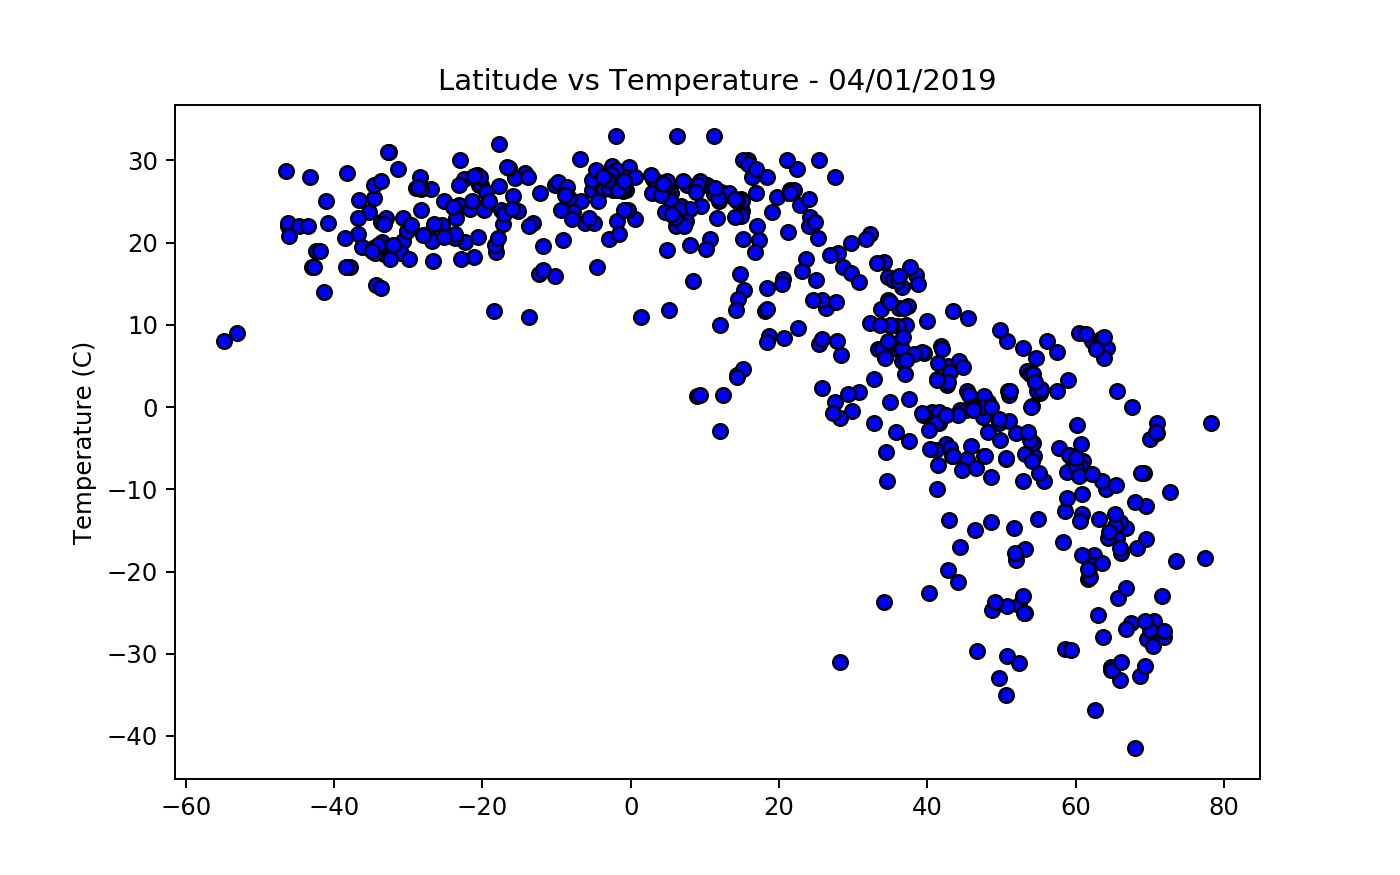

Text(0,0.5,'Temperature (C)')

In [23]:
#primera grafica
plt.figure(figsize=(8,5))
plt.scatter(array_latitude, array_temperature, marker="o", facecolors="blue", edgecolors="black")
plt.title("Latitude vs Temperature - 04/01/2019")
plt.ylabel("Temperature (C)")

In [24]:
plt.savefig('lat_vs_temp.png')


In [25]:
# segunda grafica
array_humidity = []
current_humidity = 0
for city in cities:
    query_url = f"{url}appid={api_key}&q={city}&units={units}"
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    if weather_json["cod"] != '404':
        current_humidity = weather_json["main"]["humidity"]
        array_humidity.append(current_humidity)

In [26]:
print(array_humidity)

[83, 100, 97, 69, 100, 54, 74, 67, 38, 91, 100, 100, 76, 100, 59, 84, 92, 86, 98, 86, 93, 87, 27, 100, 52, 88, 51, 91, 63, 96, 46, 84, 99, 95, 48, 69, 75, 69, 100, 65, 82, 82, 100, 60, 41, 21, 88, 80, 80, 88, 36, 57, 75, 92, 39, 78, 64, 76, 23, 100, 78, 84, 100, 60, 99, 56, 100, 36, 78, 63, 54, 100, 77, 74, 100, 57, 89, 50, 45, 77, 76, 92, 62, 92, 87, 100, 57, 82, 68, 76, 100, 96, 53, 95, 59, 92, 92, 81, 83, 25, 85, 33, 85, 87, 84, 100, 89, 96, 69, 100, 66, 71, 79, 69, 62, 85, 70, 94, 100, 58, 100, 73, 67, 74, 94, 80, 74, 46, 74, 85, 88, 87, 81, 96, 85, 91, 57, 85, 52, 100, 15, 92, 19, 58, 89, 85, 77, 75, 88, 73, 100, 67, 85, 94, 63, 100, 79, 100, 58, 93, 28, 99, 31, 19, 48, 95, 100, 59, 86, 82, 93, 100, 94, 93, 70, 100, 47, 93, 95, 100, 78, 68, 46, 84, 74, 92, 77, 52, 100, 95, 98, 42, 35, 79, 91, 94, 93, 43, 92, 0, 85, 80, 95, 78, 59, 67, 75, 61, 79, 74, 41, 74, 68, 52, 96, 100, 90, 86, 74, 93, 92, 89, 46, 80, 69, 79, 83, 72, 35, 54, 88, 73, 30, 96, 100, 75, 100, 83, 100, 81, 41, 98, 

<IPython.core.display.Javascript object>


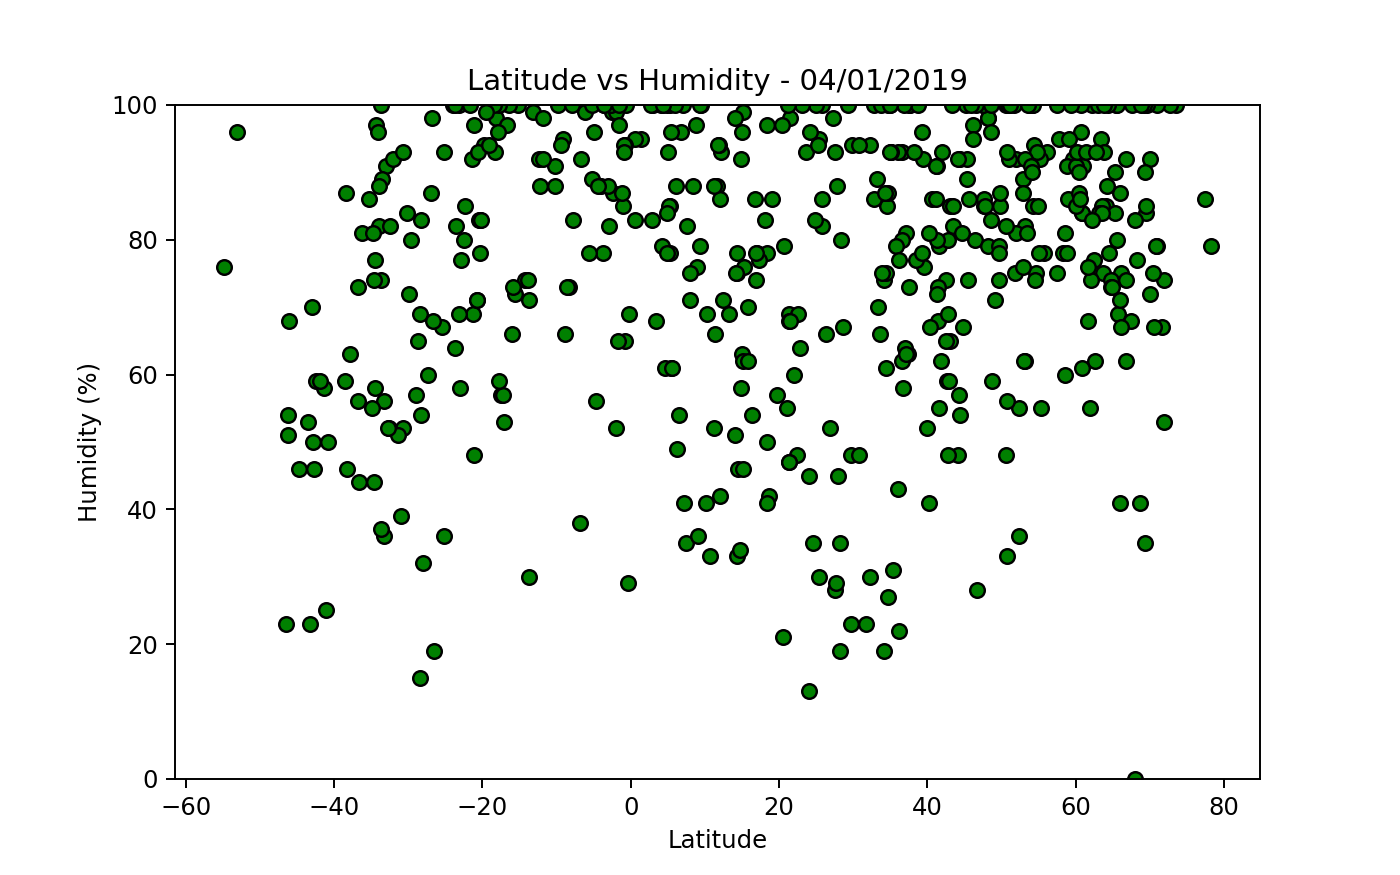

In [27]:
plt.figure(figsize=(8,5))
plt.scatter(array_latitude, array_humidity, marker = "o", facecolors = "green", edgecolors = "black")
plt.ylim(0,100)
plt.title("Latitude vs Humidity - 04/01/2019")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

In [28]:
plt.savefig("lat_vs_hum.png")

In [29]:
#grafica con viento
array_wind = []
current_wind = 0
for city in cities:
    query_url = f"{url}appid={api_key}&q={city}&units={units}"
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    if weather_json["cod"] != '404':
        current_wind = weather_json["wind"]["speed"]
        array_wind.append(current_wind)

In [30]:
print(array_wind)

[1.5, 2.86, 1.06, 5.1, 8.76, 13.31, 3.81, 1.96, 4.36, 6.21, 5.56, 3.56, 6.2, 3.91, 6.7, 3.6, 4.46, 2.56, 7.46, 4.81, 8.06, 1.41, 2.1, 1.71, 3.71, 3.6, 6.16, 2.76, 3.1, 3.11, 4.46, 3.1, 1.06, 0.71, 1.5, 5.1, 2.1, 1.36, 4.1, 6.7, 7.2, 3.76, 5.41, 6.7, 1.26, 3.51, 2.6, 9.3, 1.66, 3.11, 4.6, 4.1, 0.81, 2.1, 4.91, 2.1, 1.5, 3.1, 9.41, 3.96, 4.21, 2.56, 0.81, 4.6, 7.36, 6.91, 0.91, 1.86, 4.6, 1.41, 9.3, 4.36, 3.1, 3.1, 0.5, 4.1, 7.81, 6.7, 1.81, 1.5, 2.11, 4.41, 2.6, 6.41, 4.56, 11.81, 2.1, 3.86, 9.86, 1.51, 9.16, 3.71, 2.91, 1.56, 2.1, 0.76, 7.2, 3.6, 1.66, 10.3, 3.1, 4.11, 5.1, 2.76, 4.06, 2.61, 4.6, 13.4, 3.1, 0.56, 2.6, 1.41, 1.86, 3.1, 1.5, 7.26, 6.7, 3.31, 7.26, 3.1, 6.46, 2.6, 6.21, 3.1, 1.5, 0.41, 2, 6.7, 4.1, 2, 1, 1, 1.31, 6.41, 1.86, 0.76, 1.76, 3.16, 1.5, 3.11, 2.1, 4, 3.1, 1.01, 5.61, 8.46, 3.1, 6.81, 1.61, 0.91, 1.86, 2.6, 3.1, 2.6, 1.5, 5.11, 5.1, 0.91, 4.1, 7.7, 2.1, 1.41, 3.6, 1.01, 0.46, 0.61, 3.21, 6.7, 1.91, 2.06, 5.7, 4.1, 0.66, 2.26, 2.1, 2.51, 4.1, 1.71, 0.91, 6.41, 4.

<IPython.core.display.Javascript object>


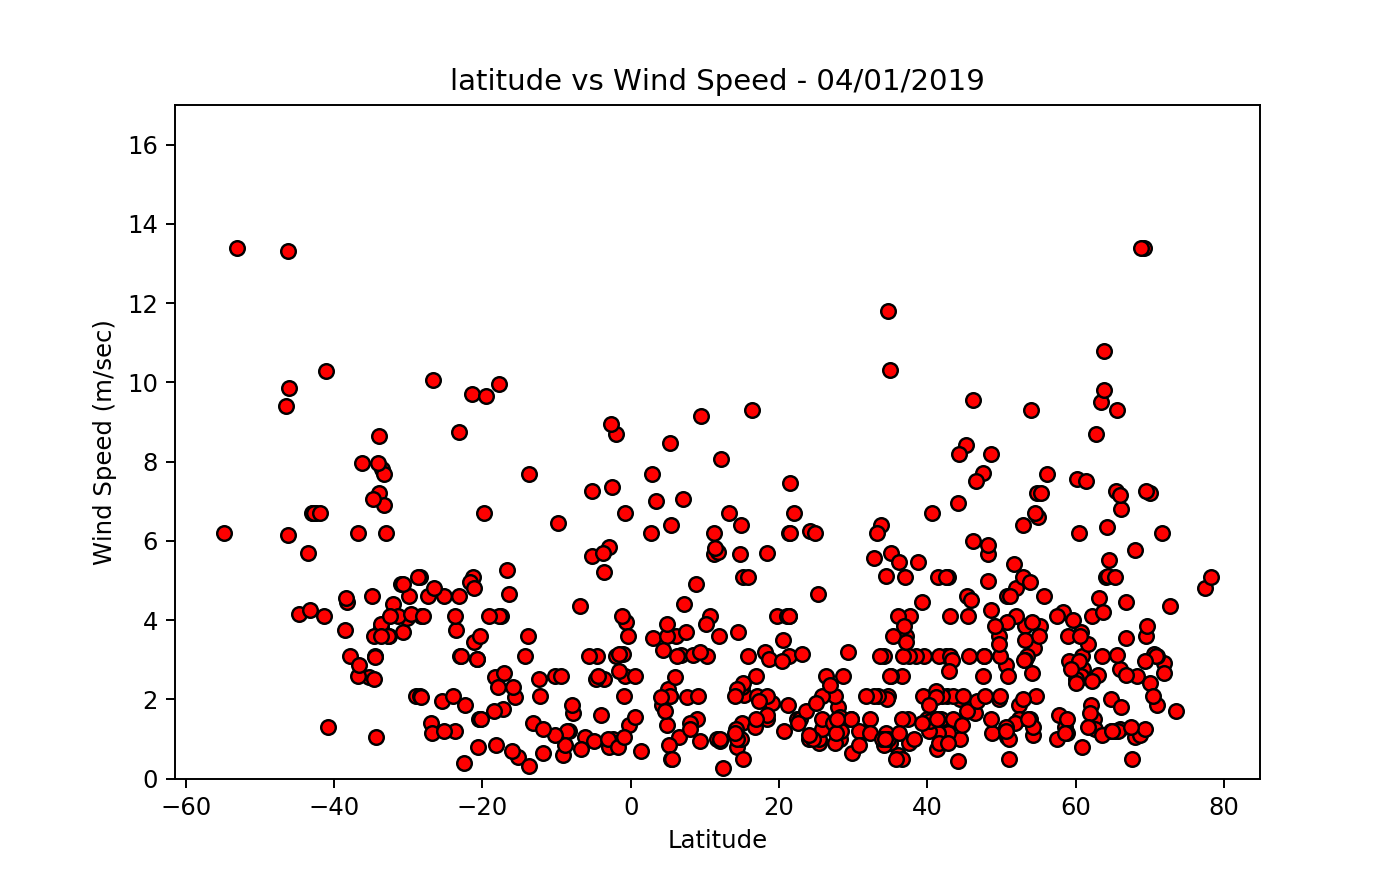

In [31]:
plt.figure(figsize=(8,5))
plt.scatter(array_latitude, array_wind, marker = "o", facecolors = "red", edgecolors = "black")
plt.ylim(0,17)
plt.title("latitude vs Wind Speed - 04/01/2019")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/sec)")
plt.show()

In [32]:
plt.savefig("lat_vs_wind.png")

In [33]:
#query nubes
array_clouds = []
current_clouds = 0
for city in cities:
    query_url = f"{url}appid={api_key}&q={city}&units={units}"
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    if weather_json["cod"] != '404':
        current_clouds = weather_json["clouds"]["all"]
        array_clouds.append(current_clouds)


In [34]:
print(array_clouds)

[40, 68, 44, 40, 92, 20, 0, 0, 36, 8, 92, 88, 40, 0, 12, 90, 48, 0, 0, 56, 100, 88, 1, 48, 0, 0, 12, 88, 92, 92, 0, 90, 92, 0, 40, 75, 90, 64, 92, 90, 20, 20, 20, 40, 32, 32, 40, 64, 56, 0, 92, 0, 0, 90, 0, 75, 75, 20, 36, 80, 80, 76, 92, 0, 56, 88, 92, 12, 75, 0, 40, 92, 40, 75, 40, 75, 48, 75, 0, 90, 0, 0, 1, 20, 76, 8, 12, 20, 24, 0, 92, 68, 32, 36, 90, 20, 75, 0, 8, 0, 90, 24, 64, 44, 76, 44, 90, 75, 75, 80, 0, 8, 80, 20, 1, 76, 75, 88, 48, 75, 12, 0, 36, 75, 75, 20, 24, 75, 90, 64, 20, 20, 8, 92, 48, 80, 20, 92, 1, 20, 0, 75, 1, 36, 92, 92, 88, 44, 44, 44, 20, 12, 90, 40, 75, 0, 75, 92, 0, 92, 5, 92, 1, 0, 0, 36, 76, 0, 0, 8, 75, 40, 88, 0, 75, 64, 40, 75, 0, 0, 1, 64, 0, 44, 80, 0, 90, 8, 90, 80, 88, 0, 0, 90, 76, 75, 88, 1, 92, 0, 75, 75, 92, 75, 20, 56, 90, 0, 90, 0, 24, 24, 44, 20, 32, 92, 44, 0, 0, 75, 0, 92, 12, 0, 40, 75, 56, 12, 0, 0, 92, 0, 40, 68, 24, 88, 56, 40, 56, 100, 8, 88, 40, 75, 20, 8, 20, 75, 0, 0, 88, 20, 36, 20, 48, 40, 0, 12, 75, 76, 90, 8, 40, 8, 20, 0, 1, 0

<IPython.core.display.Javascript object>


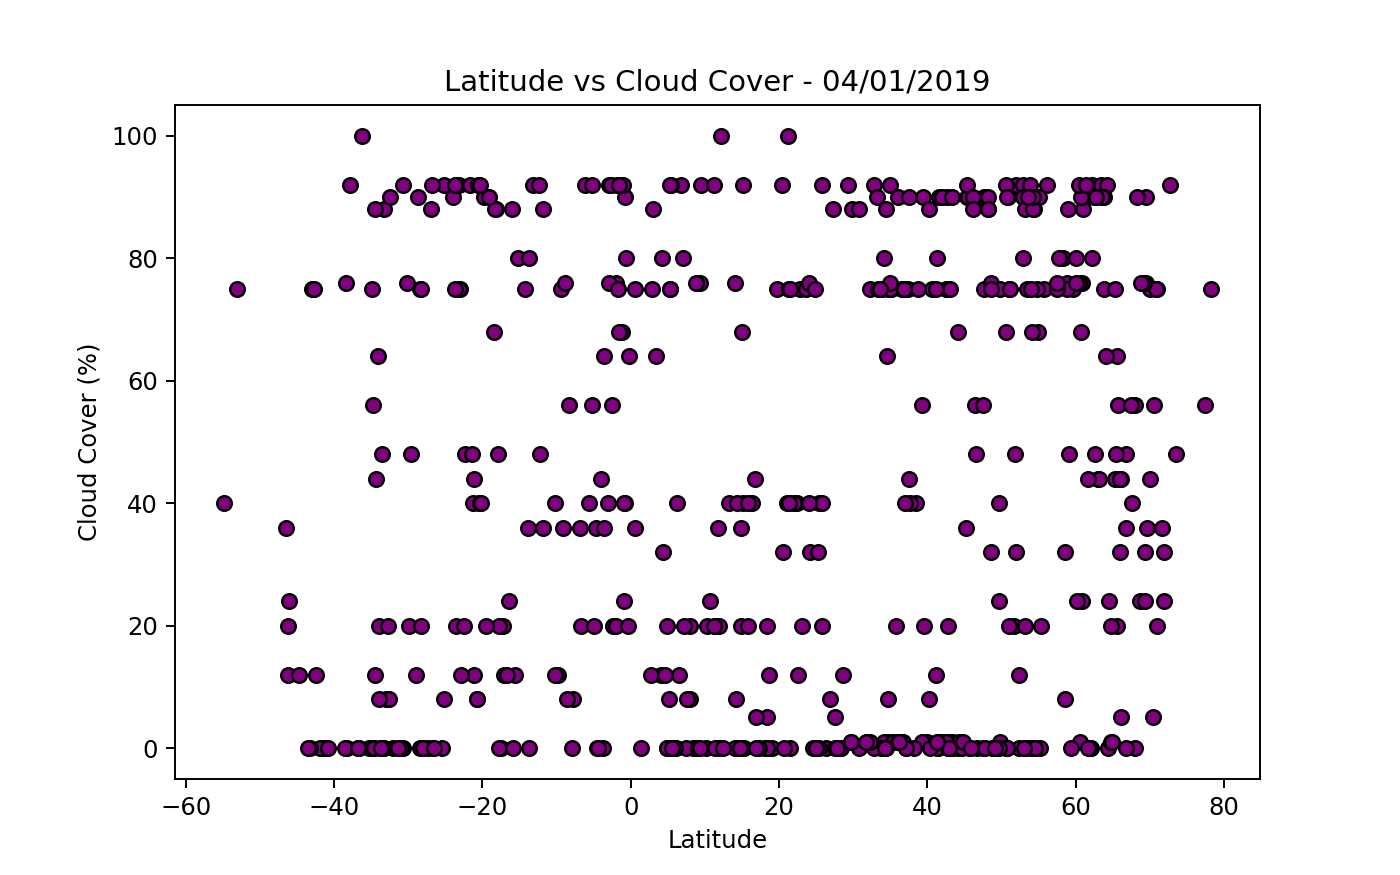

In [35]:
#grafica nubes
plt.figure(figsize=(8,5))
plt.scatter(array_latitude, array_clouds, marker = "o", facecolors = "purple", edgecolors = "black")
plt.title("Latitude vs Cloud Cover - 04/01/2019")
plt.xlabel("Latitude")
plt.ylabel("Cloud Cover (%)")
plt.show()



In [36]:
plt.savefig("lat_vs_cloud.png")

In [38]:
#sacamos nombre de ciudad para el csv requerido
array_city_name = []
current_city_name = ""
for city in cities:
    query_url = f"{url}appid={api_key}&q={city}&units={units}"
    cities_response = requests.get(query_url)
    cities_json = cities_response.json()
    if cities_json["cod"] != "404":
        current_city_name = cities_json["name"]
        array_city_name.append(current_city_name)
        
    
    


In [40]:
print(array_city_name)

['Mahebourg', 'Severo-Kurilsk', 'Hermanus', 'Avarua', 'Rikitea', 'Mataura', 'Chuy', 'Taltal', 'Pio IX', 'East London', 'Mingguang', 'Butaritari', 'Ushuaia', 'Busselton', 'Castro', 'Tuktoyaktuk', 'Yar-Sale', 'Ulladulla', 'Cockburn Town', 'Qaanaaq', 'San Policarpo', 'San Patricio', 'Lompoc', 'Dikson', 'De Aar', 'Hambantota', 'Kaitangata', 'Konosha', 'Mount Gambier', 'Georgetown', 'Barrow', 'Hay River', 'Kiunga', 'Chepareria', 'Beba', 'Marau', 'Omagh', 'Puerto Leguizamo', 'Klaksvik', 'Puerto Ayora', 'Cape Town', 'Bluff', 'Katangli', 'Kapaa', 'Aykhal', 'Atar', 'Mtwara', 'Tasiilaq', 'Vostok', 'Garowe', 'Yulara', 'Tarata', 'Marzuq', 'Saint George', 'Carnarvon', 'Victoria', 'Cabo San Lucas', 'Vardo', 'Mar del Plata', 'Hithadhoo', 'Togur', 'Polunochnoye', 'Kindu', 'Copiapo', 'Kavieng', 'Jamestown', 'Asmar', 'Imeni Poliny Osipenko', 'Thompson', 'La Union', 'Champerico', 'Upernavik', 'Ribeira Grande', 'Montorio al Vomano', 'Sorland', 'Hilo', 'Port Alfred', 'Hobart', 'Guerrero Negro', 'Yellowknif

In [41]:
#finalmente city id para el csv
array_city_id = []
current_city_id = ""
for city in cities:
    query_url = f"{url}appid={api_key}&q={city}&units={units}"
    cities_response = requests.get(query_url)
    cities_json = cities_response.json()
    if cities_json["cod"] != "404":
        current_city_id = cities_json["id"]
        array_city_id.append(current_city_id)
        
    
    
    

In [42]:
print(array_city_id)

[934322, 2121385, 3366880, 4035715, 4030556, 6201424, 3443061, 3870243, 3392020, 1006984, 1800519, 2110227, 3833367, 2075265, 3896218, 6170031, 1486321, 2145554, 3576994, 3831208, 1688696, 3437029, 5367788, 1507390, 1011632, 1244926, 2208248, 545353, 2156643, 3378644, 3833859, 5972762, 2093846, 199604, 3543961, 3457817, 2640967, 3671437, 2618795, 3652764, 3369157, 2175403, 2122783, 5848280, 2027296, 2381334, 877747, 3424607, 2013279, 58933, 6355222, 3927774, 72181, 262462, 1014034, 1733782, 3985710, 4372777, 3863379, 1282256, 1489499, 1494482, 212902, 3893656, 2094342, 2069194, 1148205, 2023584, 6165406, 3593500, 3530097, 3418910, 3372707, 3172646, 3137469, 5855927, 964432, 2163355, 4021858, 6185377, 1273574, 3451138, 5380437, 3374210, 2144528, 1852357, 2160063, 2122850, 2180815, 344979, 64814, 3420846, 2022572, 2399371, 5106834, 3388847, 777073, 2267254, 1640660, 7647007, 6167817, 2355548, 3421319, 863061, 3466165, 2126710, 6138908, 3874787, 5851349, 3347019, 107304, 1701054, 3381538,

In [47]:
d = {'City Name': array_city_name, 'City ID': array_city_id, 'Latitude': array_latitude, 'Temperature': array_latitude, 'Humidity': array_humidity, 'Wind Speed': array_wind, 'Cloud Cover': array_clouds  }
df = pd.DataFrame(data=d)
df

,City Name,City ID,Latitude,Temperature,Humidity,Wind Speed,Cloud Cover
0,Mahebourg,934322,-20.41,-20.41,83,1.50,40
1,Severo-Kurilsk,2121385,50.68,50.68,100,2.86,68
2,Hermanus,3366880,-34.42,-34.42,97,1.06,44
3,Avarua,4035715,-21.21,-21.21,69,5.10,40
4,Rikitea,4030556,-23.12,-23.12,100,8.76,92
5,Mataura,6201424,-46.19,-46.19,54,13.31,20
6,Chuy,3443061,-33.69,-33.69,74,3.81,0
7,Taltal,3870243,-25.41,-25.41,67,1.96,0
8,Pio IX,3392020,-6.83,-6.83,38,4.36,36
9,East London,1006984,-33.02,-33.02,91,6.21,8


In [52]:
df.to_csv('cities', sep=',')